In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
from matplotlib.image import imread

In [3]:
pwd

'C:\\Users\\HP\\Desktop\\Kaggle_Challenges\\Chest_XRay\\chest_xray'

In [4]:
my_data_dir = 'C:\\Users\\HP\\Desktop\\Kaggle_Challenges\\Chest_XRay\\chest_xray\\chest_xray\\'

In [5]:
os.listdir(my_data_dir)

['test', 'train', 'val']

In [6]:
train_path = my_data_dir + "train"
test_path = my_data_dir + "test"
val_path = my_data_dir + "val"

In [7]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [8]:
os.listdir(test_path)

['NORMAL', 'PNEUMONIA']

In [9]:
os.listdir(val_path)

['NORMAL', 'PNEUMONIA']

In [10]:
os.listdir(train_path+"\\NORMAL")[0]

'IM-0115-0001.jpeg'

In [11]:
norm_1 = imread(train_path+"\\NORMAL"+"\\IM-0115-0001.jpeg")

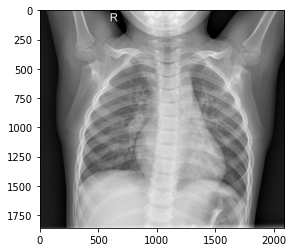

In [12]:
plt.imshow(norm_1,cmap='gray')

In [13]:
os.listdir(train_path+"\\PNEUMONIA")[0]

'person1000_bacteria_2931.jpeg'

In [14]:
pne_1 = imread(train_path+"\\PNEUMONIA"+'\\person1000_bacteria_2931.jpeg')

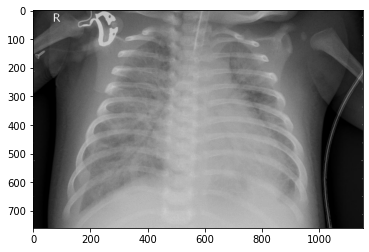

In [15]:
plt.imshow(pne_1,cmap='gray')

In [16]:
norm_1.shape

(1858, 2090)

In [17]:
pne_1.shape

(760, 1152)

In [18]:
type(pne_1)

numpy.ndarray

In [19]:
img_shape = (150,150,3)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.10, height_shift_range=0.10, 
                               rescale=1/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest' )

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [25]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [28]:
batch_size = 16

In [29]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=img_shape[:2],color_mode='rgb', batch_size=batch_size,
                                               class_mode='binary', shuffle=True)

Found 5216 images belonging to 2 classes.


In [30]:
val_image_gen = image_gen.flow_from_directory(val_path,target_size=img_shape[:2],color_mode='rgb',batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 16 images belonging to 2 classes.


In [31]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=img_shape[:2],batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 624 images belonging to 2 classes.


In [32]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [33]:
results = model.fit_generator(train_image_gen,epochs=10, validation_data=val_image_gen,callbacks=[early_stop])

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
326/326 [==============================] - 219s 670ms/step - loss: 0.4142 - accuracy: 0.8196 - val_loss: 1.0482 - val_accuracy: 0.7500
Epoch 2/10
326/326 [==============================] - 220s 675ms/step - loss: 0.2923 - accuracy: 0.8727 - val_loss: 1.4154 - val_accuracy: 0.6250
Epoch 3/10
326/326 [==============================] - 231s 709ms/step - loss: 0.2291 - accuracy: 0.9009 - val_loss: 1.4887 - val_accuracy: 0.7500


In [34]:
model.save('cxr_model_2.h5')

In [35]:
model_df = pd.DataFrame(model.history.history)

In [36]:
model_df

,loss,accuracy,val_loss,val_accuracy
0,0.414183,0.819594,1.048191,0.750
1,0.292295,0.872699,1.415353,0.625
2,0.229100,0.900882,1.488686,0.750


In [37]:
cnn_pred = model.predict_generator(test_image_gen)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [38]:
#cnn_pred

In [39]:
predictions = cnn_pred > 0.5 

In [40]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [41]:
print(classification_report(test_image_gen.classes , predictions))

              precision    recall  f1-score   support

           0       0.84      0.51      0.63       234
           1       0.76      0.94      0.84       390

    accuracy                           0.78       624
   macro avg       0.80      0.72      0.74       624
weighted avg       0.79      0.78      0.76       624



In [42]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[119 115]
 [ 23 367]]


In [43]:
x = np.arange(0,1,0.01)

In [44]:
d = []
for i in x:
    prediction = cnn_pred > i
    d.append(accuracy_score(test_image_gen.classes,prediction))

In [45]:
the_df = pd.DataFrame({'threshold':list(x) , 'accuracy': d})

In [46]:
the_df[the_df['accuracy']==the_df['accuracy'].max()]

,threshold,accuracy
64,0.64,0.804487
65,0.65,0.804487


# hence the threshold should be 0.64

In [71]:
threshold = 0.64

In [72]:
prediction = cnn_pred > threshold

In [73]:
print(confusion_matrix(test_image_gen.classes,predictions))
print('\n')
print(classification_report(test_image_gen.classes,predictions))

[[119 115]
 [ 23 367]]


              precision    recall  f1-score   support

           0       0.84      0.51      0.63       234
           1       0.76      0.94      0.84       390

    accuracy                           0.78       624
   macro avg       0.80      0.72      0.74       624
weighted avg       0.79      0.78      0.76       624



# prediction on a single image

In [60]:
from tensorflow.keras.preprocessing import image

# NORMAL CHEST XRAY

In [61]:
sample_image_1 = imread(test_path + "\\NORMAL\\"+"IM-0029-0001.jpeg" ) 

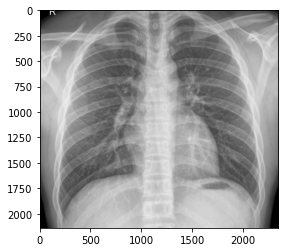

In [62]:
plt.imshow(imread(test_path + "\\NORMAL\\"+"IM-0029-0001.jpeg"),cmap='gray')

In [63]:
sample_image_1 = image.load_img(test_path + "\\NORMAL\\"+"IM-0029-0001.jpeg",target_size=(150,150))
sample_image_1 = image.img_to_array(sample_image_1)
sample_image_1 = np.expand_dims(sample_image_1,axis=0)
sample_image_1 = sample_image_1/255

In [64]:
prediction_prob = model.predict(sample_image_1)

In [65]:
# function to implement whether the predictied probabilty is close to NORMAL or PNEUMONIA
def cxr(x):
    if x >= threshold:
        return('PNEUMONIA')
    else:
        return ('NORMAL')

In [66]:
print(cxr(prediction_prob))

NORMAL


# CORRECT PREDICTION

# NOW LET'S CHECK FOR PNEUMONIA CHEST XRAY

In [67]:
sample_image_2 = image.load_img(test_path + "\\PNEUMONIA\\"+"person1_virus_11.jpeg",target_size=(150,150))
sample_image_2 = image.img_to_array(sample_image_2)
sample_image_2 = np.expand_dims(sample_image_2,axis=0)
sample_image_2 = sample_image_2/255

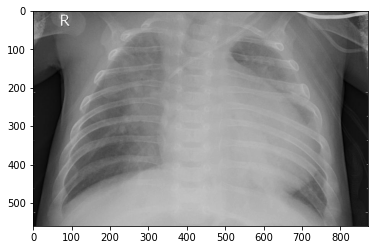

In [68]:
plt.imshow(imread(test_path + "\\PNEUMONIA\\"+"person1_virus_11.jpeg"),cmap='gray')

In [69]:
pred = model.predict(sample_image_2)

In [70]:
print(cxr(pred))

PNEUMONIA


# OUR MODEL PREDCICTED CORRECTLY